In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
secim= np.random.choice(range(0,10),size=(10000,1))
secim

array([[1],
       [7],
       [7],
       ...,
       [1],
       [8],
       [8]])

In [8]:
satir=(np.arange(10)==secim).astype(int)
satir

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [9]:
rnd=df.iloc[0,:].values
rnd

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
satir

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [14]:
((satir==1)&(satir==rnd)).sum(axis=1).mean()

0.2978

In [17]:
N = 10000
ads=df.columns
print(ads)
ad_dict=dict()
print(ad_dict)

Index(['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9',
       'Ad 10'],
      dtype='object')
{}


In [25]:
l1 = ["eat","sleep","repeat"] 
s1 = "geek"
  
# creating enumerate objects 
obj1 = enumerate(l1) 
obj2 = enumerate(s1) 

print(list(enumerate(l1)) )
  
# changing start index to 2 from 0 
print (list(enumerate(s1,9)) )

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(9, 'g'), (10, 'e'), (11, 'e'), (12, 'k')]


In [26]:
for j,i in enumerate(ads):
    ad_dict[i]={"Index":j,"R":0,"N":0, "UCB":9999}    

In [37]:
ad_dict

{'Ad 1': {'Index': 0, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 2': {'Index': 1, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 3': {'Index': 2, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 4': {'Index': 3, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 5': {'Index': 4, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 6': {'Index': 5, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 7': {'Index': 6, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 8': {'Index': 7, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 9': {'Index': 8, 'R': 0, 'N': 0, 'UCB': 9999},
 'Ad 10': {'Index': 9, 'R': 0, 'N': 0, 'UCB': 9999}}

In [70]:
import math
def UCB(Ri,Ni,n):
    ri=Ri/Ni
    Di=((3/2)*(math.log(n)/Ni))**0.5
    UCB=ri+Di
    return UCB

In [56]:
#a=('Ad 1', {'Index': 0, 'R': 0, 'N': 0, 'UCB': 9999})
#a[1]["UCB"]

In [57]:
def Max_ucb(ad_dict):
    return max(ad_dict.items(),key=lambda x: x[1]["UCB"])

In [58]:
ad_dict.items()

dict_items([('Ad 1', {'Index': 0, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 2', {'Index': 1, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 3', {'Index': 2, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 4', {'Index': 3, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 5', {'Index': 4, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 6', {'Index': 5, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 7', {'Index': 6, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 8', {'Index': 7, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 9', {'Index': 8, 'R': 0, 'N': 0, 'UCB': 9999}), ('Ad 10', {'Index': 9, 'R': 0, 'N': 0, 'UCB': 9999})])

In [59]:
Max_ucb(ad_dict)

('Ad 1', {'Index': 0, 'R': 0, 'N': 0, 'UCB': 9999})

In [60]:
Max_ucb(ad_dict)[0]

'Ad 1'

In [61]:
Max_ucb(ad_dict)[1]["Index"]

0

In [64]:
df.iloc[1,:].values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [71]:
for i in range(N):
    secim= Max_ucb(ad_dict)[0]
    secimNo= Max_ucb(ad_dict)[1]["Index"]   
    rnd=df.iloc[i,:].values
    satir=(np.arange(10)==secimNo).astype(int)
    revard=((satir==1)&(satir==rnd)).sum()
    ad_dict[secim]["R"]+=revard
    ad_dict[secim]["N"]+=1
    ad_dict[secim]["UCB"]=UCB(ad_dict[secim]["R"],ad_dict[secim]["N"],i+1)
    #print(secim +" = revrd :",revard," = UCB :", ad_dict[secim]["UCB"])

In [72]:
ad_dict.items()

dict_items([('Ad 1', {'Index': 0, 'R': 164, 'N': 872, 'UCB': 0.3137542785529476}), ('Ad 2', {'Index': 1, 'R': 54, 'N': 413, 'UCB': 0.3133784639901696}), ('Ad 3', {'Index': 2, 'R': 20, 'N': 252, 'UCB': 0.3131623046024682}), ('Ad 4', {'Index': 3, 'R': 42, 'N': 358, 'UCB': 0.31346517496975657}), ('Ad 5', {'Index': 4, 'R': 1650, 'N': 6141, 'UCB': 0.31611706086310865}), ('Ad 6', {'Index': 5, 'R': 2, 'N': 153, 'UCB': 0.3131002456370086}), ('Ad 7', {'Index': 6, 'R': 42, 'N': 358, 'UCB': 0.31346627328913906}), ('Ad 8', {'Index': 7, 'R': 174, 'N': 912, 'UCB': 0.3136853591968933}), ('Ad 9', {'Index': 8, 'R': 43, 'N': 362, 'UCB': 0.3138314596451077}), ('Ad 10', {'Index': 9, 'R': 7, 'N': 182, 'UCB': 0.3135345392644395})])

In [73]:
sum([i[1]["R"]for i in ad_dict.items()])

2198

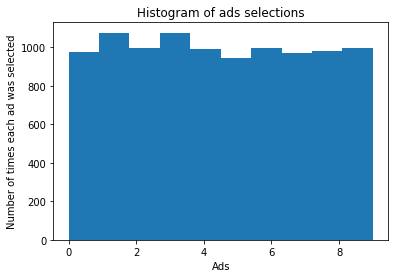

total reward: 1216


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

print('total reward:', total_reward)

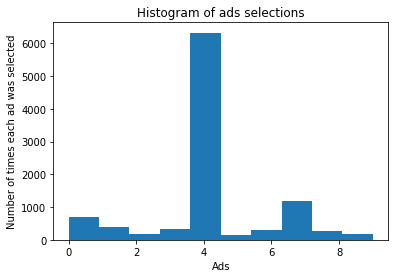

total reward: 2178


In [75]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

print('total reward:', total_reward)